In [1]:
### Setup packages
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(cowplot)

install.packages("psych")
library(psych)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────

#  DSCI 100 Group 27 Project Report: 

# Using Government Health Expenditure to Predict the Life Expectancy of Nations

## 1. Overview:

### 1.1 Introduction

**Insert Citations for papers**

Life expectancy is a statistic that varies throughout countries based on many factors. A common question in healthcare continues to be asked: what can be done to improve life expectancy? As countries continue to improve on this aspect, the statistics are crucial to prove statements and observe trends. It is often dicussed how much effort should go into health expenditure which defines the amount spent on health care and services such as research, insurance, and more. 

Through this project the analysis of the relationship between life expectancy and health expenditure will be observed. 
"How much does a country's health expenditure predict it's average life expectency?"

The dataset used will list the data collected on life expectancy, health expenditure, bmi, mortality rates, and more... all sorted by country in an alphabetically ordered fashion. For this project however, the primary focus will be on the columns for country, life expectancy, and health expenditure.

### 1.2 Methods

#### 1.2.1 Data Set Description

We use World Bank data for life expectancy numbers and level of government health expenditure for each country from the years 2000 to 2015.

Our dataset includes the following indicators:

**A. Economic Variables** - collected to undertand differences in health expenditure between different countries
- income_classification: The World Bank classifies countries by income (Low, Lower middle, Upper middle, High)
- gdp_per_capita (NY.GDP.PCAP.CD): GDP per capita (current USD)
- health_exp (SH.XPD.GHED.PC.CD): Domestic general government health expenditure per capita (current USD
- health_exp_to_gdp: Health expenditure as a % of GDP (health expenditure / GDP)

**We create a new variable health_exp_to_gdp:** Health expenditure determines how much of a country's total avaliable wealth it spends on its health systems. This information allows us to explore whether life expectancy is more closely predicted by the absolute amount of money spent, or if the amount of money relative to the country's wealth is a key factor.


**B. Mortality Variables** - collected to understand correlation with life expectancy as logic checks
- life_expectancy (SP.DYN.LE00.IN): Life expectancy at birth, total (years)
- mortality_infant (SP.DYN.IMRT.IN): Mortality rate, infant (per 1,000 live births)
- mortality_adult_f (SP.DYN.AMRT.FE): per 1,000 female adults
- mortality_adult_m (SP.DYN.AMRT.MA): per 1,000 male adults

**C. Health Variables** - collected to understand relationship between health outcomes and health expenditure
- cancer_diabetes_death_perc (H.DYN.NCOM.ZS): Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)
- measles (SH.IMM.MEAS): Immunization, measles (% of children ages 12-23 months)
- hiv_aids (SH.DYN.AIDS.ZS): Prevalence of HIV, total (% of population ages 15-49)




#### 1.2.2 Regression Model

To build a model that would predict life expectancy based on a country's health expenditure, we use a KNN Regression with a 75/25 split and an optimal $k = 18$.

We choose to use the KNN Regression rather than a linear regression for this exercise because when graphing life expectancy against a country's health expenditure, we see a clear logarithmic relationship rather than a linear one.

For our Train-Test Split, we decided to use a 75/25 split so that we have a "sufficiently" large data for building the model and testing the model. Additionally, we break down observations (countries) into four income levels based on World Bank categorizations (High Income, Upper Middle Income, Lower Middle Income, and Low Income). Doing a 75/25 split would, theoretically would also mirror how countries are split into quarters.

### 1.3 Discussion


#### 1.3.1 Summary of Findings
As expected, countries with higher GDP tend to have higher health expenditure. The life expectancy has been increasing at a similar steady rate regardless of income classification. Interestingly, in the “Life Expectancy over Time” graph, there was a more of a steeper increase in life expectancy for the lower income class in comparison to the higher income class.
Health expenditure % vs Life expectancy graph: general trend of the overall graph hits a plateau at the mid 80’s. The higher the percent of GDP on health expenditure, the higher the life expectancy, therefore, as income class increases the closer they are to the plateau.

An interesting observation was that although the health expenditure for low income countries decreased over time, there seemed to be an increase in life expectancy over time. This can mean that there is no direct relationship between health expenditure and life expectancy. Rather, the percent GDP on health expenditure seemed to have a more significant relationship with life expectancy. It is possible that because of the higher GDP, the higher income countries also have better living environments that have a significant role in life expectancy. To answer the question “Given health expenditure, what would be the life expectancy?”, there is no actual relationship between the two but after health expenditure reaches a certain point (around 1000) life expectancy hits a plateau at around the mid 80’s. Most likely from the limits of health technology.
discuss whether this is what you expected to find?

Earlier we firstly expected to find that high income countries would have higher health expenditure which was clearly evident from graph set 1 in which higher the income, higher was the health expenditure per capita. Additionally, we thought that there would be a certain point where marginal return of health expenditure would start to drop. This seems to be partially right as from graph set 2, we find that around the age of 80 marks the beginning of a point where marginal return of health expenditure starts to flatten i.e forming a plateau.

#### 1.3.2 Impact of Findings

The interesting findings from this analysis could lead us to a world-wide impact on one of the biggest concerns for a country’s health investment and the possible  health outcomes and life expectancy. For example; one such outcome led us to a conclusion that health expenditure does not directly impact life expectancy, instead the  health expenditure per capita of a country impacts life expectancy in a significant way. Another such outcome was that looking at the variables such as mortality rates and deaths from a disease such as cancer/measles does not reveal anything impactful as lesser the deaths more the life expectancy is not a groundbreaking result.

#### 1.3.3 Future Questions

We’ve concluded from our findings that there is no direct relationship between life expectancy and health expenditure so a question could be asked whether it’s possible to increase or decrease health expenditure as well as increasing life expectancy. To do this, there would need to be further analysis of more contributors towards life expectancy. 

One could think that a constant increase in health expenditure could advance health technology thus increasing life expectancy but from our findings there seemed to be a plateau of around mid 80’s after hitting a certain point in health expenditure. A question of whether or not it’s possible to increase life expectancy any further with health technology could be asked. Is there another factor that has a more significant role in life expectancy? If so, what?



### 1.4 References

https://databank.worldbank.org/home.aspx

## 2. Data Set-up:

### 2.1 Get Data

#### Step 1: Install WDI Package
- First we can download the World Bank Inidicators database through R packages on CRAN.
- The WDI Package allows users to search and download data from over 40 datasets hosted by the World Bank, including the World Development Indicators (‘WDI’), International Debt Statistics, Doing Business, Human Capital Index, and Sub-national Poverty indicators.
- Details can be found here: [`WDI`](https://cran.r-project.org/package=WDI) (first release Aug 2013)

In [2]:
# Access Data
install.packages("WDI")
library(WDI)
new_wdi_cache <- WDIcache()

also installing the dependency ‘RJSONIO’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



#### Step 2: WDI Indicator search
- Next we find out the IDs for the indicators we are interested in as listed above (e.g. GDP, population, and etc.)

In [3]:
# Mortality Variables:
WDIsearch("life expectancy at birth.*total", cache = new_wdi_cache)
WDIsearch("^mortality.*rate.*infant", cache = new_wdi_cache)
WDIsearch("mortality rate.*adult", cache = new_wdi_cache)

indicator 
                         "SP.DYN.LE00.IN" 
                                     name 
"Life expectancy at birth, total (years)"

indicator,name
HF.DYN.IMRT.IN,"Mortality rate, infant (per 1,000 live births)"
HF.DYN.IMRT.IN.Q1,"Mortality rate, infant (per 1,000 live births): Q1 (lowest)"
HF.DYN.IMRT.IN.Q2,"Mortality rate, infant (per 1,000 live births): Q2"
HF.DYN.IMRT.IN.Q3,"Mortality rate, infant (per 1,000 live births): Q3"
HF.DYN.IMRT.IN.Q4,"Mortality rate, infant (per 1,000 live births): Q4"
HF.DYN.IMRT.IN.Q5,"Mortality rate, infant (per 1,000 live births): Q5 (highest)"
SP.DYN.IMRT.FE.IN,"Mortality rate, infant, female (per 1,000 live births)"
SP.DYN.IMRT.IN,"Mortality rate, infant (per 1,000 live births)"
SP.DYN.IMRT.MA.IN,"Mortality rate, infant, male (per 1,000 live births)"


indicator,name
SP.DYN.AMRT.FE,"Mortality rate, adult, female (per 1,000 female adults)"
SP.DYN.AMRT.MA,"Mortality rate, adult, male (per 1,000 male adults)"


In [4]:
# Health Indicators:

WDIsearch("measles", cache = new_wdi_cache)
WDIsearch("Prevalence of HIV", cache = new_wdi_cache)
WDIsearch("cancer", cache = new_wdi_cache)

indicator,name
HF.IMM.MEAS,"Immunization, measles (% of children ages 15-23 months)"
HF.IMM.MEAS.Q1,"Immunization, measles (% of children ages 15-23 months): Q1 (lowest)"
HF.IMM.MEAS.Q2,"Immunization, measles (% of children ages 15-23 months): Q2"
HF.IMM.MEAS.Q3,"Immunization, measles (% of children ages 15-23 months): Q3"
HF.IMM.MEAS.Q4,"Immunization, measles (% of children ages 15-23 months): Q4"
HF.IMM.MEAS.Q5,"Immunization, measles (% of children ages 15-23 months): Q5 (highest)"
SH.IMM.MEA2,"Immunization, measles second dose (% of children by the nationally recommended age)"
SH.IMM.MEAS,"Immunization, measles (% of children ages 12-23 months)"
SH.IMM.MEAS.Q1.ZS,Vaccinations (Measles) (% of children ages 12-23 months): Q1 (lowest)
SH.IMM.MEAS.Q2.ZS,Vaccinations (Measles) (% of children ages 12-23 months): Q2


indicator,name
HF.DYN.AIDS.ZS,"Prevalence of HIV, total (% of population ages 15-49)"
HF.DYN.AIDS.ZS.Q1,"Prevalence of HIV, total (% of population ages 15-49): Q1 (lowest)"
HF.DYN.AIDS.ZS.Q2,"Prevalence of HIV, total (% of population ages 15-49): Q2"
HF.DYN.AIDS.ZS.Q3,"Prevalence of HIV, total (% of population ages 15-49): Q3"
HF.DYN.AIDS.ZS.Q4,"Prevalence of HIV, total (% of population ages 15-49): Q4"
HF.DYN.AIDS.ZS.Q5,"Prevalence of HIV, total (% of population ages 15-49): Q5 (highest)"
SH.DYN.AIDS.ZS,"Prevalence of HIV, total (% of population ages 15-49)"
SH.HIV.1524.FE.HG.ZS,"Prevalence of HIV, young women 15-24 years (%; high estimate)"
SH.HIV.1524.FE.LW.ZS,"Prevalence of HIV, young women 15-24 years (%; low estimate)"
SH.HIV.1524.FE.ZS,"Prevalence of HIV, female (% ages 15-24)"


indicator,name
SH.DYN.NCOM.FE.ZS,"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)"
SH.DYN.NCOM.MA.ZS,"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)"
SH.DYN.NCOM.ZS,"Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)"


In [5]:
# Economic Indicators:
WDIsearch("gdp.*current US\\$", cache = new_wdi_cache)
WDIsearch("Government health expenditure", cache = new_wdi_cache)

indicator,name
NV.SRV.DISC.CD,"Discrepancy in GDP, value added (current US$)"
NY.GDP.DISC.CD,Discrepancy in expenditure estimate of GDP (current US$)
NY.GDP.MKTP.CD,GDP (current US$)
NY.GDP.PCAP.CD,GDP per capita (current US$)
NYGDPMKTPSACD,"GDP,current US$,millions,seas. adj.,"


indicator,name
SH.XPD.GHED.CH.ZS,Domestic general government health expenditure (% of current health expenditure)
SH.XPD.GHED.GD.ZS,Domestic general government health expenditure (% of GDP)
SH.XPD.GHED.GE.ZS,Domestic general government health expenditure (% of general government expenditure)
SH.XPD.GHED.PC.CD,Domestic general government health expenditure per capita (current US$)
SH.XPD.GHED.PP.CD,"Domestic general government health expenditure per capita, PPP (current international $)"
SH.XPD.PCAP.GX,Government health expenditure per capita (current US$)


#### Step 3: Extract Indicators of Interest
- Finally, we load the indicators of interest after discovering their ID's through the search

In [6]:
WB_data <- WDI(indicator = c("SP.DYN.LE00.IN", # mortality indicators
                             "SP.DYN.IMRT.IN", 
                             "SP.DYN.AMRT.FE", 
                             "SP.DYN.AMRT.MA",
                             
                             "SH.DYN.NCOM.ZS", # health indicators
                             "SH.IMM.MEAS",
                             "SH.DYN.AIDS.ZS",
                             
                             "NY.GDP.PCAP.CD", # economic indicators
                             "SH.XPD.GHED.PC.CD"), start = 2000, end = 2015, extra = TRUE) 
head(WB_data)

,iso2c,country,year,SP.DYN.LE00.IN,SP.DYN.IMRT.IN,SP.DYN.AMRT.FE,SP.DYN.AMRT.MA,SH.DYN.NCOM.ZS,SH.IMM.MEAS,SH.DYN.AIDS.ZS,NY.GDP.PCAP.CD,SH.XPD.GHED.PC.CD,iso3c,region,capital,longitude,latitude,income,lending
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1A,Arab World,2012,70.70380,30.12576,119.8042,168.0177,23.70072,84.40057,0.1207618,7265.966,180.90736,ARB,Aggregates,,,,Aggregates,Aggregates
2,1A,Arab World,2013,70.88222,29.41262,118.1438,165.9456,23.25162,85.65699,0.1196671,7314.827,202.38211,ARB,Aggregates,,,,Aggregates,Aggregates
3,1A,Arab World,2014,71.06427,28.76091,116.5348,163.9790,23.13618,84.25917,0.1164227,7247.973,224.12115,ARB,Aggregates,,,,Aggregates,Aggregates
4,1A,Arab World,2015,71.24957,28.18686,114.9677,162.1069,23.26294,84.43326,0.1163380,6185.084,204.10991,ARB,Aggregates,,,,Aggregates,Aggregates
5,1A,Arab World,2002,68.34025,41.20505,141.1238,192.7746,25.30919,81.15830,0.1297747,2421.824,65.69651,ARB,Aggregates,,,,Aggregates,Aggregates
6,1A,Arab World,2003,68.61051,39.96641,138.7637,189.9609,25.30564,81.39962,0.1292270,2627.670,64.52460,ARB,Aggregates,,,,Aggregates,Aggregates


### 2.2 Tidy Data

To clean the data the following was completed:
- Remove aggregate regions - the World Banks include cumulative data for regions such as Americas, Asia, and etc. These observations need to be excluded.
- Indicators were renamed for easier comprehension. Descriptions can be found above.
- Irrelevant columns were removed.
- A new variable, *health expenditure to gdp (per capita)*, was generated

In [7]:
# remove aggregate regions
clean_data <- subset(WB_data, region != "Aggregates")

# rename mortality indicators
names(clean_data)[which(names(clean_data) == "SP.DYN.LE00.IN")] <- "life_expectancy"
names(clean_data)[which(names(clean_data) == "SP.DYN.IMRT.IN")] <- "mortality_infant"
names(clean_data)[which(names(clean_data) == "SP.DYN.AMRT.FE")] <- "mortality_adult_f"
names(clean_data)[which(names(clean_data) == "SP.DYN.AMRT.MA")] <- "mortality_adult_m"

# rename health indicators
names(clean_data)[which(names(clean_data) == "SH.DYN.NCOM.ZS")] <- "cancer_diabetes_death_perc"
names(clean_data)[which(names(clean_data) == "SH.IMM.MEAS")] <- "measles"
names(clean_data)[which(names(clean_data) == "SH.DYN.AIDS.ZS")] <- "hiv_aids"


# rename economic indicators
names(clean_data)[which(names(clean_data) == "NY.GDP.PCAP.CD")] <- "gdp_per_capita"
names(clean_data)[which(names(clean_data) == "SH.XPD.GHED.PC.CD")] <- "health_exp"

# select relevant variables
clean_data <- clean_data %>%
    select(country, 
           income,
           year, 
           life_expectancy,
           mortality_infant,
           mortality_adult_f,
           mortality_adult_m,
           cancer_diabetes_death_perc,
           measles,
           hiv_aids,
           gdp_per_capita,
           health_exp) %>%
    arrange(country, year) %>%
    rename(income_classification = income) %>%
    mutate(health_exp_to_gdp = health_exp / gdp_per_capita * 100) %>%
    filter(life_expectancy != "NA") %>%
    filter(health_exp_to_gdp != "NA") %>%
    filter(year != "NA")

head(clean_data)

,country,income_classification,year,life_expectancy,mortality_infant,mortality_adult_f,mortality_adult_m,cancer_diabetes_death_perc,measles,hiv_aids,gdp_per_capita,health_exp,health_exp_to_gdp
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Low income,2002,56.784,84.9,276.164,321.607,42.1,35,0.1,179.4266,0.1408732,0.07851298
2,Afghanistan,Low income,2003,57.271,82.3,269.540,314.533,41.5,39,0.1,190.6838,1.2402778,0.65043684
3,Afghanistan,Low income,2004,57.772,79.6,262.917,307.459,41.4,48,0.1,211.3821,1.1299019,0.53453061
4,Afghanistan,Low income,2005,58.290,77.0,256.293,300.386,40.9,50,0.1,242.0313,1.2708190,0.52506386
5,Afghanistan,Low income,2006,58.826,74.3,249.669,293.312,40.5,53,0.1,263.7336,1.3045715,0.49465502
6,Afghanistan,Low income,2007,59.375,71.7,243.045,286.238,40.1,55,0.1,359.6932,1.7679117,0.49150550


### 2.3 Split Dataset

In [8]:
# Spliting data into training and testing
set.seed(1011) # DO NOT CHANGE

combined_split <- initial_split(clean_data, prop = 0.75, strata = life_expectancy)
training <- training(combined_split)
testing <- testing(combined_split)


## 3. Tables & Graphs:

### 3.1 Summary Tables

We produce the following tables below:

- Table 1: Summary Table for number of observations in each Income Classification
- Table 2: Summary Table for Mortality Indicators
- Table 3: Summary Table for Health 
- Table 4: Summary Table for Economic Indicators

#### Table 1: Income Classification
- We want to classify countries based on income levels to understand better the mortality/health outcomes vs health expenditure of at each income level. This table summarizes the number of countries and classified in each category.

- The World Bank classifies countries based on income levels into 4 categories:
    - *Low*
    - *Lower middle*
    - *Upper middle*
    - *High*
    
    
- **Table 1** summarizes the number of countries that is in each income group:
    - 14% of countries are classified as *Low income*
    - 22% of countries are classified as *Lower middle income*
    - 28% of countries are classified as *Upper middle income*
    - 37% of countries are classified as *High income*

In [11]:
table1 <- training %>%
    select(income_classification, country) %>%
    distinct() %>%
    group_by(income_classification) %>%
    summarize(country_count = n()) %>%
    mutate(percentage = round(country_count / sum(country_count, na.rm = TRUE) * 100))

table1

`summarise()` ungrouping output (override with `.groups` argument)



income_classification,country_count,percentage
<chr>,<int>,<dbl>
High income,53,29
Low income,28,15
Lower middle income,46,25
Upper middle income,55,30


#### Table 2: Mortality Indicators

Here we summarize Mortality Indicators for each income group:
- *Life Expectancy*: Life expectancy at birth, total (years)
- *Infant Mortality Rate*: Mortality rate, infant (per 1,000 live births)
- *Adult Mortality Rate (Female)*: per 1,000 female adults
- *Adult Mortality Rate (Male)*: per 1,000 male adults

We use this table to show that:
- there is a sufficiently large sample for each indicator
- summary statistics (mean, sd, min, max, and etc.) that tell us some key information for each group

Findings:
- life expectancy increases for countries in higher income groups
- mortality variables are lower for higher income countries
- mortality of males are higher than mortality of females for each income group

In [12]:
# Table 2

# Mortality Variables
table2 <- describeBy(training[c("life_expectancy",
                               "mortality_infant",
                               "mortality_adult_f",
                               "mortality_adult_m")], group=training$income_classification, fast=TRUE)

table2


 Descriptive statistics by group 
group: High income
                  vars   n   mean    sd   min    max  range   se
life_expectancy      1 635  77.71  3.20 69.13  83.79  14.66 0.13
mortality_infant     2 635   6.46  4.31  1.80  25.30  23.50 0.17
mortality_adult_f    3 632  67.56 23.68 34.32 141.64 107.32 0.94
mortality_adult_m    4 632 128.67 56.63 63.34 355.58 292.23 2.25
------------------------------------------------------------ 
group: Low income
                  vars   n   mean    sd    min    max  range   se
life_expectancy      1 323  56.75  6.25  40.37  74.41  34.04 0.35
mortality_infant     2 323  69.18 22.48  16.40 136.90 120.50 1.25
mortality_adult_f    3 323 289.22 90.90  78.94 545.79 466.85 5.06
mortality_adult_m    4 323 336.64 91.40 148.80 639.63 490.83 5.09
------------------------------------------------------------ 
group: Lower middle income
                  vars   n   mean     sd   min    max  range   se
life_expectancy      1 540  64.02   7.47 42.52  75.92  3

#### Table 3: Health Indicators

Here we summarize Health Indicators for each income group:
- *Cancer_diabetes_death_perc*: Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)
- *Measles*: Immunization, measles (% of children ages 12-23 months)
- *Hiv/Aids*: Prevalence of HIV, total (% of population ages 15-49)

We use this table to show that:
- there is a sufficiently large sample for each indicator
- summary statistics (mean, sd, min, max, and etc.) that tell us some key information for each group

Findings:
- % of the population who die from CVD, cancer, diabetes or CRD between exact ages 30 and 70 are very similar between countries of different income groups
- immunization for children against measles is high amongst all countries but low income countries still on average have a 20% lower immunization rate compared to high income countries
- prevalence of HIV/AIDS is lower in high income countries but very similar for low income, lower middle income, and upper middle income groups.

In [13]:
table3 <- describeBy(training[c("cancer_diabetes_death_perc",
                               "measles",
                               "hiv_aids")], group=training$income_classification, fast=TRUE)

table3


 Descriptive statistics by group 
group: High income
                           vars   n  mean   sd  min  max range   se
cancer_diabetes_death_perc    1 633 16.28 5.50  8.4 34.9  26.5 0.22
measles                       2 635 93.85 5.25 65.0 99.0  34.0 0.21
hiv_aids                      3 302  0.33 0.39  0.1  2.0   1.9 0.02
------------------------------------------------------------ 
group: Low income
                           vars   n  mean    sd  min  max range   se
cancer_diabetes_death_perc    1 323 26.85  5.30 17.6 42.1  24.5 0.30
measles                       2 323 71.16 17.20 16.0 99.0  83.0 0.96
hiv_aids                      3 323  2.80  3.18  0.1 14.9  14.8 0.18
------------------------------------------------------------ 
group: Lower middle income
                           vars   n  mean    sd  min  max range   se
cancer_diabetes_death_perc    1 540 27.09  8.93 10.2 56.0  45.8 0.38
measles                       2 540 81.19 16.05 21.0 99.0  78.0 0.69
hiv_aids              

#### Table 4: Economic Indicators

Here we summarize Health Indicators for each income group:
- *GDP*: GDP per capita (current USD)
- *Health Expenditure*: Domestic general government health expenditure per capita (current USD)
- *Health Expenditure to GDP*: Health expenditure as a % of GDP per capita (health expenditure / GDP)

We use this table to show that:
- there is a sufficiently large sample for each indicator
- summary statistics (mean, sd, min, max, and etc.) that tell us some key information for each group

Findings:
- The average GDP per capita becomes exponentially larger as we move up in income level
- The average health expenditure per capita is significantly higher in High Income countries but also tends to vary significantly in in all groups with more significant overlaps between groups.
- When we look at health expenditure per capita as a percentage of gdp per capita, we see that on average the ratio between the two variables is similar between each income group but, again, varies significantly.

In [14]:
table4 <- describeBy(training[c("gdp_per_capita",
                                "health_exp",
                                "health_exp_to_gdp")], group=training$income_classification, fast=TRUE)

table4


 Descriptive statistics by group 
group: High income
                  vars   n     mean       sd     min       max     range     se
gdp_per_capita       1 635 29953.35 20265.28 3293.23 118823.65 115530.42 804.20
health_exp           2 635  1622.10  1485.58   99.91   7857.19   7757.29  58.95
health_exp_to_gdp    3 635     4.93     2.05    0.90      9.25      8.35   0.08
------------------------------------------------------------ 
group: Low income
                  vars   n   mean     sd    min     max   range    se
gdp_per_capita       1 323 537.32 297.62 111.93 2032.62 1920.70 16.56
health_exp           2 323   6.43   4.78   0.14   35.70   35.56  0.27
health_exp_to_gdp    3 323   1.25   0.68   0.08    3.61    3.53  0.04
------------------------------------------------------------ 
group: Lower middle income
                  vars   n    mean      sd   min     max   range    se
gdp_per_capita       1 540 1620.90 1028.11 90.53 5408.41 5317.88 44.24
health_exp           2 540   38.68 

### 3.2 Graphs:


**Graph Set 1**

We graph the average ratio of health expenditure per capita to GDP per capita of each low, medium, and high income countries (as classified by the World Bank) across time as well the change is life expectancy over time.

`summarise()` regrouping output by 'income_classification' (override with `.groups` argument)

`summarise()` regrouping output by 'income_classification' (override with `.groups` argument)



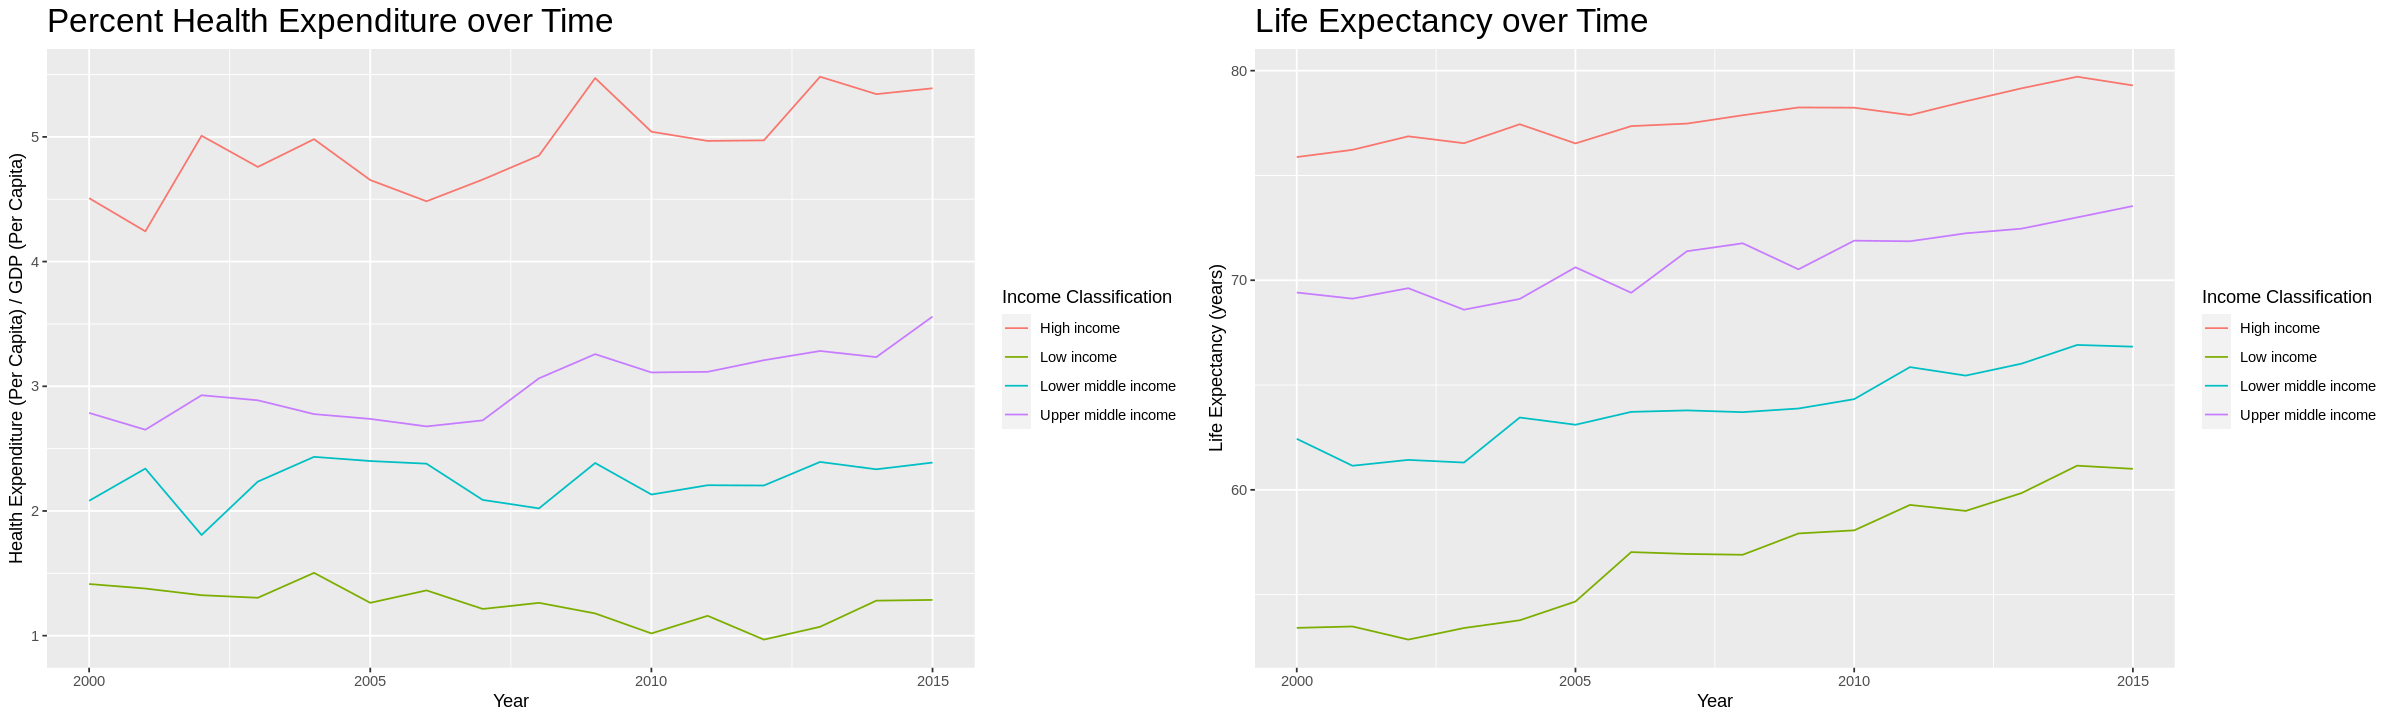

In [30]:
options(repr.plot.width = 20, repr.plot.height = 6)

average_ratio <- training %>%
    select(country, year, income_classification, health_exp_to_gdp) %>%
    group_by(income_classification, year) %>%
    summarize(average_ratio = mean(health_exp_to_gdp, na.rm = TRUE))

average_ratio_life_ex <- training %>%
    select(country, year, income_classification, life_expectancy) %>%
    group_by(income_classification, year) %>%
    summarize(average_ratio = mean(life_expectancy, na.rm = TRUE))

Proposal_Plot_1.1 <- average_ratio %>%
ggplot(aes(x = year, y = average_ratio, color = income_classification))+
geom_line()+
labs(x= "Year", y= "Health Expenditure (Per Capita) / GDP (Per Capita)", color = "Income Classification")  +
ggtitle("Percent Health Expenditure over Time") +
theme(plot.title = element_text(size=20))

Proposal_Plot_1.2 <- average_ratio_life_ex %>%
ggplot(aes(x = year, y = average_ratio, color = income_classification))+
geom_line()+
labs(x= "Year", y= "Life Expectancy (years)", color = "Income Classification")  +
ggtitle("Life Expectancy over Time") +
theme(plot.title = element_text(size=20))

plot_grid(Proposal_Plot_1.1, Proposal_Plot_1.2, ncol = 2)


Proposal_Plot_1.3 <- average_ratio %>%
ggplot(aes(x = year, y = average_ratio, color = income_classification))+
geom_point()+
labs(x= "Year", y= "Health Expenditure (Per Capita) / GDP (Per Capita)", color = "Income Classification")  +
ggtitle("Percent Health Expenditure over Time") +
theme(plot.title = element_text(size=20))

We can see that, as a general trend, higher income countries tend to spend a higher presentage of their GDP on health expenditure. It also seems that they tend to increase spending at a faster rate than lower classifcations. 

However, despite the differences in spending total/rate, it would seem that life expectancy has been rising over time at a consistent rate for all income classifications. This seems to indicate that time (or year to be more specific) is a significant variable in relation to life expectancy.

( It is also worth noting how much faster the life expectancy of low income countries has been rising compared to all other classifications, even despite a decrease in total health expenditure )

**Graph Set 2**

We graph the relationship between health expendiditure (both in total and as a percent) and life expectancy.

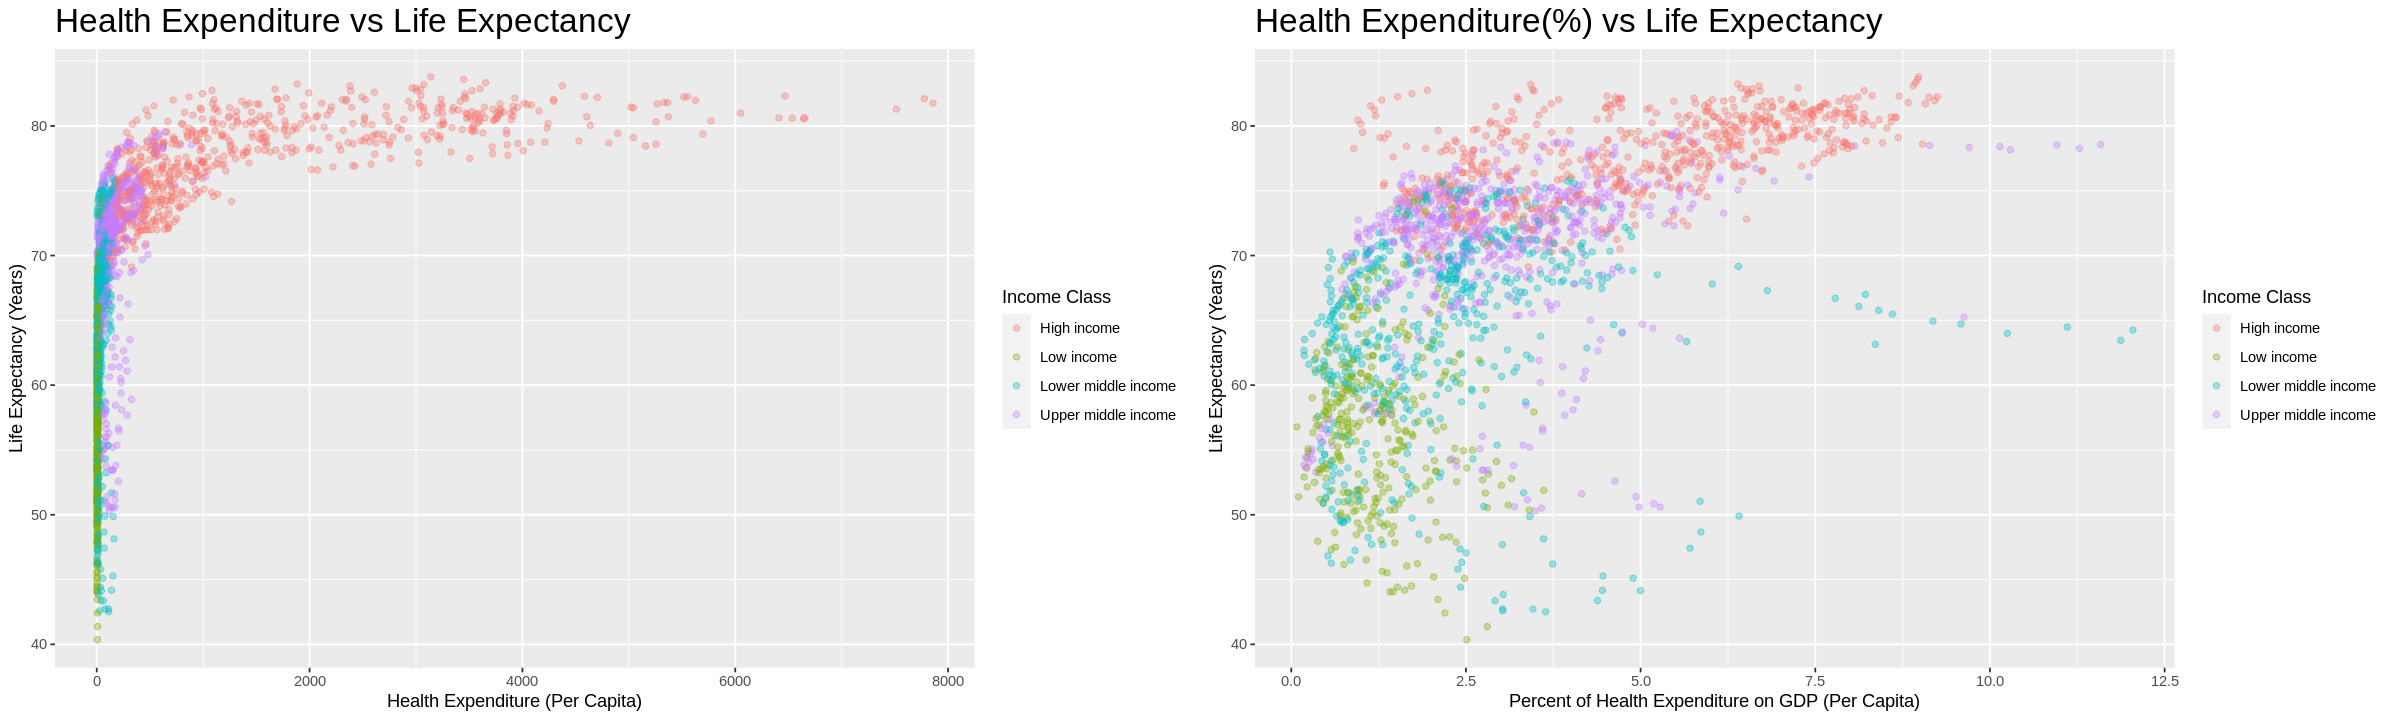

In [14]:
options(repr.plot.width = 20, repr.plot.height = 6)

Proposal_Plot_2.1<-training %>%
    ggplot(aes(x = health_exp, 
               y = life_expectancy, color = income_classification))+
    geom_point(alpha=0.35)+
    labs(y = "Life Expectancy (Years)", 
         x = "Health Expenditure (Per Capita)", 
         color = "Income Class") +
    ggtitle("Health Expenditure vs Life Expectancy") +
    theme(plot.title = element_text(size=20))

Proposal_Plot_2.2<-training %>%
    ggplot(aes(x = health_exp_to_gdp, 
               y = life_expectancy, color = income_classification))+
    geom_point(alpha=0.35)+
    labs(y = "Life Expectancy (Years)", 
         x = "Percent of Health Expenditure on GDP (Per Capita)", 
         color = "Income Class") +
    ggtitle("Health Expenditure(%) vs Life Expectancy") +
    theme(plot.title = element_text(size=20))

plot_grid(Proposal_Plot_2.1, Proposal_Plot_2.2, ncol = 2)

Interestingly, for Plot 2.1, we can see a sharp logarithmic relationship between the variables. This would seem to indicate that marginal increases in health expenditure can have significant effects on life expectancy. However, there does seem to be a limit to this as seen with many of the observations with the "High Income" classification. Further increases to spending seem to yeild diminishing results with the life expectancy forming a plateau at around 80-85 years of life expectancy.

In Plot 2.2, we can observe significant overlap in the percent of government spending going to health expenditures. Most of the observations occupy a percent range between 0 and 5 percent, and yet despite this, higher income classifications still outpreform lower income classifications. This would seem to indicate that lower income countries get less mileage from their spending, and that percent spending might not be an ideal indicator without accounting for total gdp (which is not included in our dataset). 

**Graph Set 3**

We graph mortality rates for male and female adults, as well infants against life expectancy in the training set.

Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 7 rows containing missing values (geom_point).”


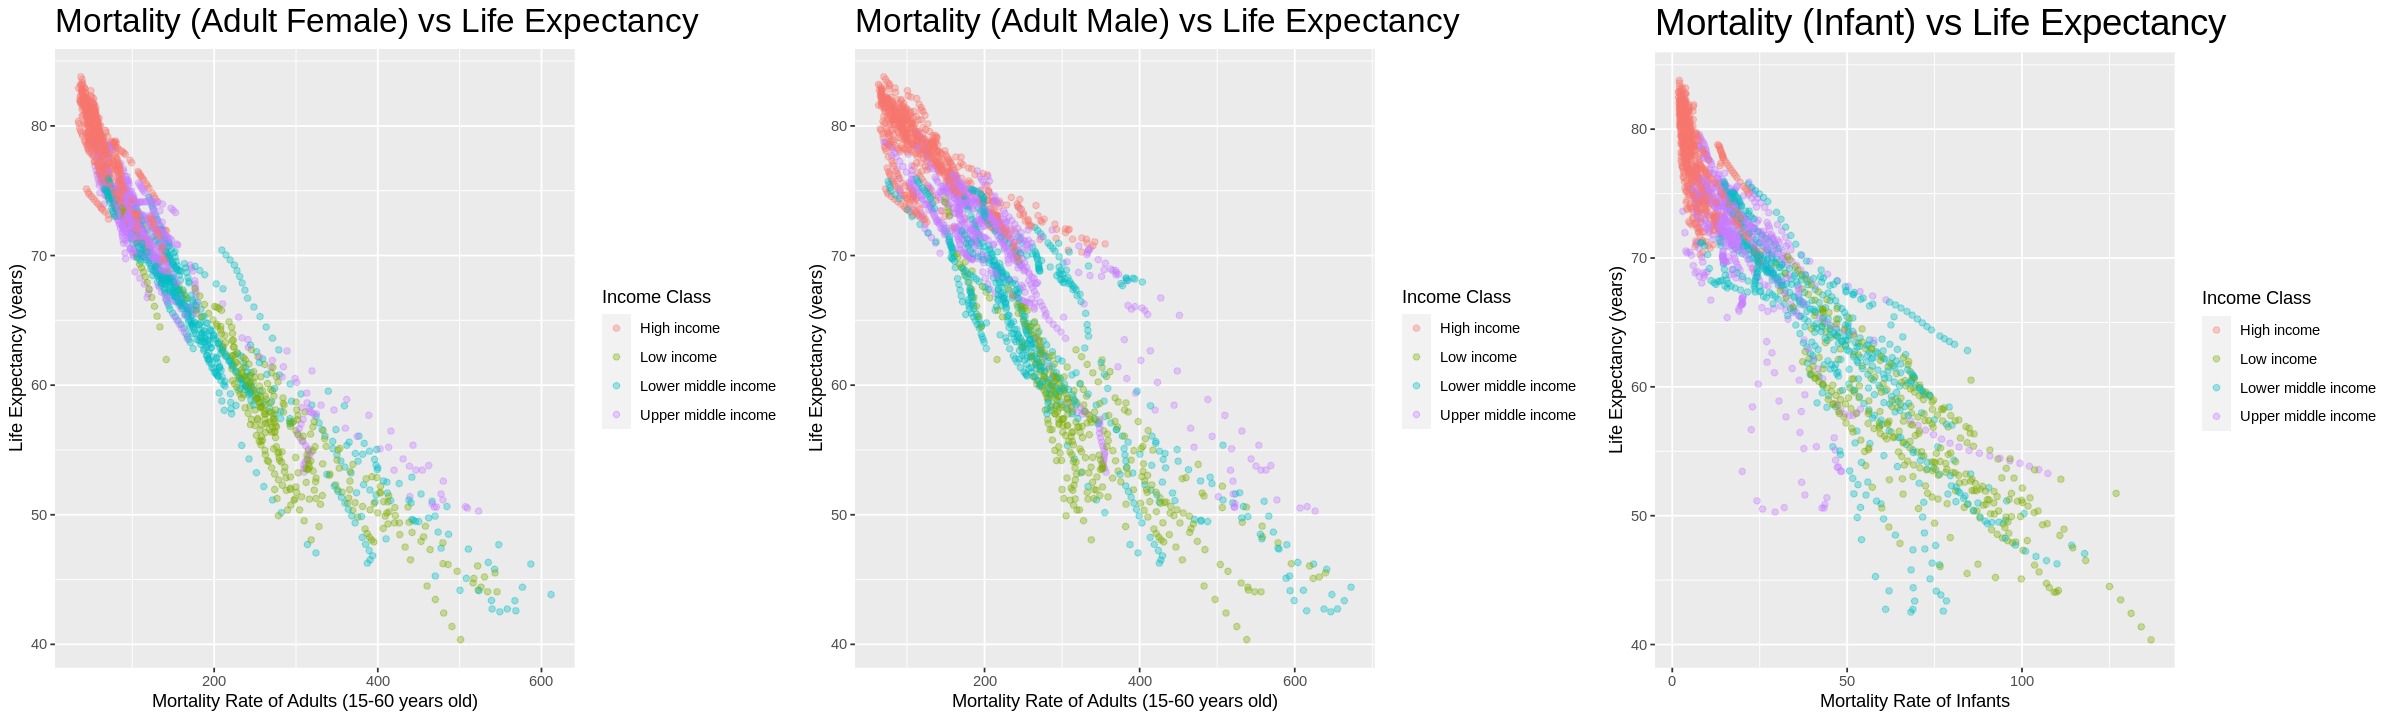

In [15]:
options(repr.plot.width = 10, repr.plot.height = 6)

Proposal_Plot_3.1<-training %>%
    ggplot(aes(y = life_expectancy, 
               x = mortality_adult_f, 
               color = income_classification))+
    geom_point(alpha=0.35)+
    labs(y = "Life Expectancy (years)", 
         x = "Mortality Rate of Adults (15-60 years old)", 
         color = "Income Class") +
    ggtitle("Mortality (Adult Female) vs Life Expectancy") +
    theme(plot.title = element_text(size=20))

Proposal_Plot_3.2<-training %>%
    ggplot(aes(y = life_expectancy, 
               x = mortality_adult_m, 
               color = income_classification))+
    geom_point(alpha=0.35)+
    labs(y = "Life Expectancy (years)", 
         x = "Mortality Rate of Adults (15-60 years old)", 
         color = "Income Class") +
    ggtitle("Mortality (Adult Male) vs Life Expectancy") +
    theme(plot.title = element_text(size=20))

Proposal_Plot_3.3<-training %>%
    ggplot(aes(y = life_expectancy, 
               x = mortality_infant, 
               color = income_classification))+
    geom_point(alpha=0.35)+
    labs(y = "Life Expectancy (years)", 
         x = "Mortality Rate of Infants", 
         color = "Income Class") +
    ggtitle("Mortality (Infant) vs Life Expectancy") +
    theme(plot.title = element_text(size=22))

options(repr.plot.width = 20, repr.plot.height = 6)

plot_grid(Proposal_Plot_3.1, Proposal_Plot_3.2, Proposal_Plot_3.3, ncol = 3)

Here we can see a linear decrease for life expectancy as the mortality rate increases for both age and sex groups. These relationships are a bit redundant as mortality rates and life expectancy are conceptually and practically inverses of each other, and so a linear decrease is to be expected. Even so, these relationships act as a good logic check. 

**Graph Set 4**

We graph health outcome variables against health expenditure and life expectancy.

Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 570 rows containing missing values (geom_point).”


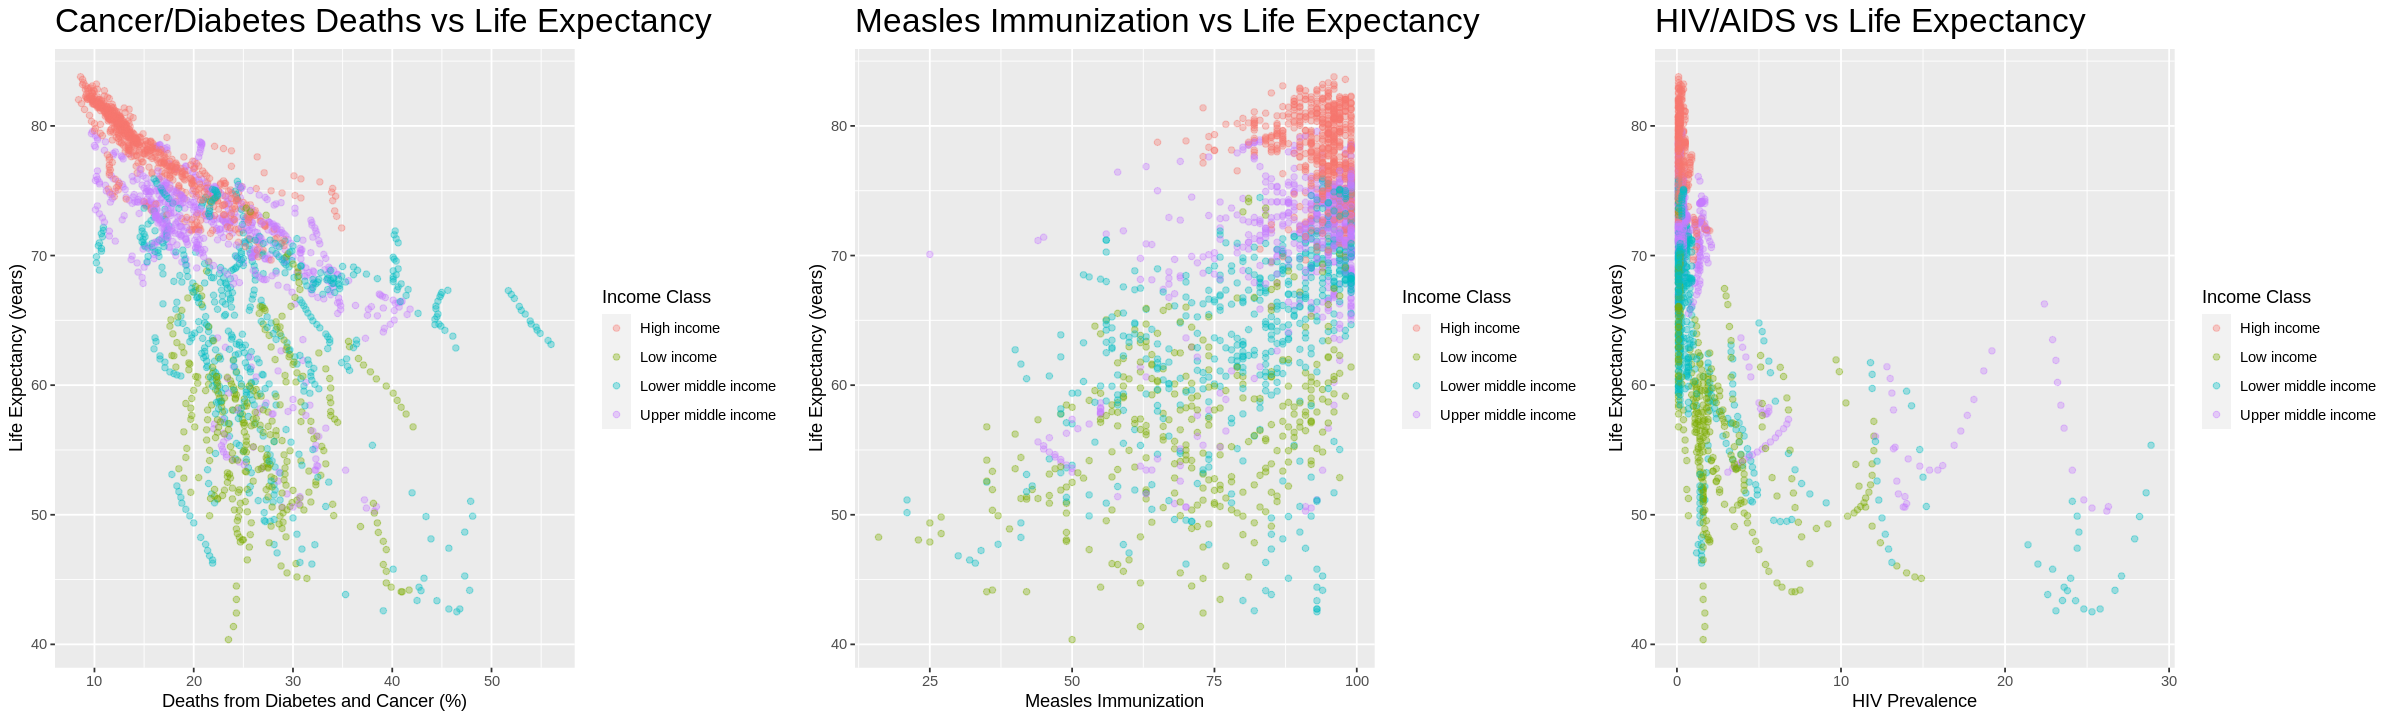

In [16]:
Proposal_Plot_4.1 <- training %>%
    ggplot(aes(y = life_expectancy, 
               x = cancer_diabetes_death_perc, 
               color = income_classification)) +
    geom_point(alpha=0.35) +
    labs(x = "Deaths from Diabetes and Cancer (%)", 
         y = "Life Expectancy (years)", 
         color = "Income Class") +
    ggtitle("Cancer/Diabetes Deaths vs Life Expectancy") +
    theme(plot.title = element_text(size=20))

Proposal_Plot_4.2 <- training %>%
    ggplot(aes(y = life_expectancy, 
               x = measles, 
               color = income_classification))+
    geom_point(alpha=0.35)+
    labs(x = "Measles Immunization", 
         y = "Life Expectancy (years)", 
         color = "Income Class") +
    ggtitle("Measles Immunization vs Life Expectancy") +
    theme(plot.title = element_text(size=20))

Proposal_Plot_4.3 <- training %>%
ggplot(aes(y = life_expectancy, 
           x = hiv_aids, 
           color = income_classification))+
    geom_point(alpha=0.35)+
    labs(x = "HIV Prevalence", 
         y = "Life Expectancy (years)", 
         color = "Income Class") +
    ggtitle("HIV/AIDS vs Life Expectancy") +
    theme(plot.title = element_text(size=20))

options(repr.plot.width = 20, repr.plot.height = 6)
plot_grid(Proposal_Plot_4.1, Proposal_Plot_4.2, Proposal_Plot_4.3, ncol = 3)

Cancer/Diabetes deaths as a % of population have a strong negative correlation with life expectancy. Similarly, increasing measles immunization, increases life expectancy. Both of these makes sense and are expected. We can see that "richer" countries in general have less deaths from Cancer/Diabetes and more immunization against measles, which speaks to higher health expenditure amongst these countries. There are, however, significant overlaps of points in the scatterplots. 

HIV/AIDS prevalence has a more interesting relationship to life expectancy. It is worth noting that in countries where it is prevalent, the life expectancy tends to be lower on average but this varies significantly for lower/upper middle income countries. This could be due to the nature of the disease or variance in health policies and contraceptive norms between cultures and nations.

## 4. KNN Regression Model & Exploration

Finally, we look to regress health expenditure to life expectancy using the KNN Regression Model.

First step in our regression analysis is to create our model's predictive recipe and find the ideal number of neighbors to use in the final model.

In [43]:
## recipe
life_exp_recipe <- recipe(life_expectancy ~ health_exp + year, data = training) %>%
      step_scale(all_predictors()) %>%
      step_center(all_predictors())

While we're basically already done with the recipe, finding the best k will require the use of cross-validtion.

In [44]:
# Seed
set.seed(1011) # DO NOT CHANGE

## Finding best k value
k_tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>%
    set_mode("regression")

## Using 5 folds just out of convention. No reason we couldn't use more besides the time it would take to process.
life_exp_vfold<-vfold_cv(training, v = 5, strata = life_expectancy)

## Testing 100 values of k. Could do more, but it would take longer to process just as before.
k_vals_vector<-tibble(neighbors = c(1:100))

## Finding the model with the smallest RMSE
life_tune_results<-workflow() %>%
   add_recipe(life_exp_recipe) %>%
   add_model(k_tune_spec) %>%
   tune_grid(resamples = life_exp_vfold, grid = k_vals_vector) %>%
   collect_metrics()

k_best<- life_tune_results %>%
  filter(.metric == "rmse") %>%
  arrange(desc(mean, std_err)) %>% 
  slice(100) %>%
  pull(neighbors)

k_best

[1] 18

Here we can see that the best number of neighbors to use in our model is 18. Moving forward, all we need to do is remake the workflow with our k_best value and we can start to test on our testing data.

In [45]:
## New spec w/ k_best neighbors
life_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_best) %>%
         set_engine("kknn") %>%
         set_mode("regression")

life_exp_best_fit <- workflow() %>%
         add_recipe(life_exp_recipe) %>%
         add_model(life_best_spec ) %>%
         fit(data = training)

With the final model in hand, we can finally start to work on our testing split and see how well our model actually works.

In [46]:
## Predicting test data
life_exp_summary <- life_exp_best_fit %>%
          predict(testing) %>%
          bind_cols(testing) %>%
          metrics(truth = life_expectancy, estimate = .pred)

life_exp_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,5.7083849
rsq,standard,0.6362827
mae,standard,4.0428730


After running our prediction tests we can see that our RMSPE value is 5.71, meaning our model can predict a country's life expectancy with its expenditure and the year within a range of 5.71 years. 